In [110]:
from env import user, host, password
import pandas as pd
from math import ceil
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

In [2]:
def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'


In [3]:
def new_telco_data():
    '''
    This function reads the telco data from the Codeup db into a df.
    '''
    sql_query = """
                select * from customers
                join contract_types using (contract_type_id)
                join internet_service_types using (internet_service_type_id)
                join payment_types using (payment_type_id)
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('telco_churn'))
    
    return df

In [4]:
df = new_telco_data()

In [5]:
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [6]:
df.columns

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [8]:
df.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


In [9]:
new_customers = df[df.total_charges.str.match(r'(^[0-9]+\.*[0-9]*$)') == False][['tenure', 'monthly_charges', 'total_charges']]
new_customers 

,tenure,monthly_charges,total_charges
945,0,56.05,
1731,0,20.00,
1906,0,61.90,
2025,0,19.70,
2176,0,20.25,
2250,0,25.35,
2855,0,73.35,
3052,0,25.75,
3118,0,52.55,
4054,0,80.85,


In [10]:
print(f'There are {len(new_customers)} customers with a tenure of 0 months and a space in the total_charges field.')

There are 11 customers with a tenure of 0 months and a space in the total_charges field.


In [11]:
if len(df[df.tenure==0]) > len(new_customers):
    print("There do exist customers with a tenure of 0 who have a value for total_charges")
else:
    print("All customers with a tenure of 0 are missing values for total_charges.")

All customers with a tenure of 0 are missing values for total_charges.


So its safe to say that the people with empty data points are people who are new customers that have a tenure of 0. So its safe to put $0.00 instead of the blank space.

In [12]:
df['total_charges'] = df.total_charges.str.replace(r'(^ $)', '0.00')

/var/folders/2j/32g17nrx0rj4vvx130_l42kw0000gn/T/ipykernel_22593/3111410145.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['total_charges'] = df.total_charges.str.replace(r'(^ $)', '0.00')


In [13]:
df['total_charges'] = pd.to_numeric(df['total_charges'])
df.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692,2279.734304
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047,2266.794470
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000,398.550000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000,1394.550000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000,3786.600000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000,8684.800000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [15]:
df.total_charges.value_counts()

0.00       11
20.20      11
19.75       9
19.90       8
20.05       8
           ..
2387.75     1
6302.80     1
2058.50     1
829.55      1
3707.60     1
Name: total_charges, Length: 6531, dtype: int64

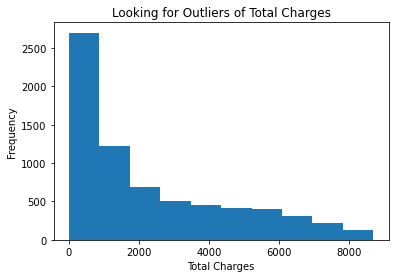

In [16]:
plt.hist(df.total_charges)
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Looking for Outliers of Total Charges')
plt.show()

In [17]:
df['Female'] = df['gender'].apply(lambda x: 1 if x == 'Female' else 0)

In [18]:
cols_to_encode = ['partner', 'dependents', 'paperless_billing']
df[cols_to_encode] = df[cols_to_encode].replace({'No': 0, 'Yes': 1})
df.head().T

,0,1,2,3,4
payment_type_id,2,2,1,1,2
internet_service_type_id,1,1,2,2,2
contract_type_id,2,1,1,1,1
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,1,0,0,1,1
dependents,1,0,0,0,0
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes


In [19]:
df['churn'] = df[['churn']].replace({'Yes': 1, 'No': 0})

In [20]:
df.head().T

,0,1,2,3,4
payment_type_id,2,2,1,1,2
internet_service_type_id,1,1,2,2,2
contract_type_id,2,1,1,1,1
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,1,0,0,1,1
dependents,1,0,0,0,0
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes


In [21]:
df['phone_service'] = df[['phone_service']].replace({'Yes': 1, 'No': 0})

In [40]:
df['multiple_lines'] = df[['multiple_lines']].replace({'Yes': 1, 'No phone service': 0, 'No': 0})

In [23]:
df['online_security'] = df[['online_security']].replace({'Yes': 1, 'No internet service': 0, 'No': 0})

In [24]:
df['online_backup'] = df[['online_backup']].replace({'Yes': 1, 'No internet service': 0, 'No': 0})

In [25]:
df['device_protection'] = df[['device_protection']].replace({'Yes': 1, 'No internet service': 0, 'No': 0})

In [26]:
df['tech_support'] = df[['tech_support']].replace({'Yes': 1, 'No internet service': 0, 'No': 0})

In [27]:
df['streaming_tv'] = df[['streaming_tv']].replace({'Yes': 1, 'No internet service': 0, 'No': 0})

In [28]:
df['streaming_movies'] = df[['streaming_movies']].replace({'Yes': 1, 'No internet service': 0, 'No': 0})

In [29]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
payment_type_id,2,2,1,1,2,4,3,4,1,2
internet_service_type_id,1,1,2,2,2,1,2,2,1,1
contract_type_id,2,1,1,1,1,1,3,3,1,3
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ,0013-MHZWF,0013-SMEOE,0014-BMAQU,0015-UOCOJ,0016-QLJIS
gender,Female,Male,Male,Male,Female,Female,Female,Male,Female,Female
senior_citizen,0,0,0,1,1,0,1,0,1,0
partner,1,0,0,1,1,0,1,1,0,1
dependents,1,0,0,0,0,1,0,0,0,1
tenure,9,9,4,13,3,9,71,63,7,65
phone_service,1,1,1,1,1,1,1,1,1,1


In [30]:
df['automated_payment'] = df.isin({'payment_type': ['Bank transfer (automatic)', 
                                                    'Credit card (automatic)']})['payment_type'].astype('int')

In [31]:
df['Mailed_check'] = df['payment_type'].apply(lambda x: 1 if x == 'Mailed check' else 0)

In [32]:
df.head().T

,0,1,2,3,4
payment_type_id,2,2,1,1,2
internet_service_type_id,1,1,2,2,2
contract_type_id,2,1,1,1,1
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,1,0,0,1,1
dependents,1,0,0,0,0
tenure,9,9,4,13,3
phone_service,1,1,1,1,1


In [33]:
df['contract_type'] = df[['contract_type']].replace({'Month-to-month': 0, 'One year': 1, 'Two year': 2})

In [34]:
df['internet_service_type'] = df[['internet_service_type']].replace({'No': 0, 'None': 0, 'DSL': 1, 'Fiber optic': 2})

In [35]:
df.head().T

,0,1,2,3,4
payment_type_id,2,2,1,1,2
internet_service_type_id,1,1,2,2,2
contract_type_id,2,1,1,1,1
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,1,0,0,1,1
dependents,1,0,0,0,0
tenure,9,9,4,13,3
phone_service,1,1,1,1,1


In [36]:
def bin_tenure(tenure):
    if tenure==1:
        return 0
    else:
        return ceil(tenure/12)

df['tenure_bin'] = df.tenure.apply(bin_tenure)

In [37]:
df.head().T

,0,1,2,3,4
payment_type_id,2,2,1,1,2
internet_service_type_id,1,1,2,2,2
contract_type_id,2,1,1,1,1
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,1,0,0,1,1
dependents,1,0,0,0,0
tenure,9,9,4,13,3
phone_service,1,1,1,1,1


In [42]:
df = df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'payment_type', 'customer_id', 'gender', 'tenure'])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   senior_citizen         7043 non-null   int64  
 1   partner                7043 non-null   int64  
 2   dependents             7043 non-null   int64  
 3   phone_service          7043 non-null   int64  
 4   multiple_lines         7043 non-null   int64  
 5   online_security        7043 non-null   int64  
 6   online_backup          7043 non-null   int64  
 7   device_protection      7043 non-null   int64  
 8   tech_support           7043 non-null   int64  
 9   streaming_tv           7043 non-null   int64  
 10  streaming_movies       7043 non-null   int64  
 11  paperless_billing      7043 non-null   int64  
 12  monthly_charges        7043 non-null   float64
 13  total_charges          7043 non-null   float64
 14  churn                  7043 non-null   int64  
 15  cont

In [44]:
df.head().T

,0,1,2,3,4
senior_citizen,0.0,0.0,0.00,1.00,1.0
partner,1.0,0.0,0.00,1.00,1.0
dependents,1.0,0.0,0.00,0.00,0.0
phone_service,1.0,1.0,1.00,1.00,1.0
multiple_lines,0.0,1.0,0.00,0.00,0.0
online_security,0.0,0.0,0.00,0.00,0.0
online_backup,1.0,0.0,0.00,1.00,0.0
device_protection,0.0,0.0,1.00,1.00,0.0
tech_support,1.0,0.0,0.00,0.00,1.0
streaming_tv,1.0,0.0,0.00,1.00,1.0


In [52]:
def my_train_test_split(df, target):
    
    train, test = train_test_split(df, test_size=.2, random_state=42, stratify=df['churn'])
    train, validate = train_test_split(train, test_size=.25, random_state=42, stratify=train['churn'])
    
    return train, validate, test

In [60]:
train, validate, test = my_train_test_split(df, 'churn')

In [68]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 455 to 5658
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   senior_citizen         1409 non-null   int64  
 1   partner                1409 non-null   int64  
 2   dependents             1409 non-null   int64  
 3   phone_service          1409 non-null   int64  
 4   multiple_lines         1409 non-null   int64  
 5   online_security        1409 non-null   int64  
 6   online_backup          1409 non-null   int64  
 7   device_protection      1409 non-null   int64  
 8   tech_support           1409 non-null   int64  
 9   streaming_tv           1409 non-null   int64  
 10  streaming_movies       1409 non-null   int64  
 11  paperless_billing      1409 non-null   int64  
 12  monthly_charges        1409 non-null   float64
 13  total_charges          1409 non-null   float64
 14  churn                  1409 non-null   int64  
 15  co

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 2332 to 6377
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   senior_citizen         4225 non-null   int64  
 1   partner                4225 non-null   int64  
 2   dependents             4225 non-null   int64  
 3   phone_service          4225 non-null   int64  
 4   multiple_lines         4225 non-null   int64  
 5   online_security        4225 non-null   int64  
 6   online_backup          4225 non-null   int64  
 7   device_protection      4225 non-null   int64  
 8   tech_support           4225 non-null   int64  
 9   streaming_tv           4225 non-null   int64  
 10  streaming_movies       4225 non-null   int64  
 11  paperless_billing      4225 non-null   int64  
 12  monthly_charges        4225 non-null   float64
 13  total_charges          4225 non-null   float64
 14  churn                  4225 non-null   int64  
 15  c

In [70]:
validate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 2111 to 2722
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   senior_citizen         1409 non-null   int64  
 1   partner                1409 non-null   int64  
 2   dependents             1409 non-null   int64  
 3   phone_service          1409 non-null   int64  
 4   multiple_lines         1409 non-null   int64  
 5   online_security        1409 non-null   int64  
 6   online_backup          1409 non-null   int64  
 7   device_protection      1409 non-null   int64  
 8   tech_support           1409 non-null   int64  
 9   streaming_tv           1409 non-null   int64  
 10  streaming_movies       1409 non-null   int64  
 11  paperless_billing      1409 non-null   int64  
 12  monthly_charges        1409 non-null   float64
 13  total_charges          1409 non-null   float64
 14  churn                  1409 non-null   int64  
 15  c

In [73]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,4225.0,0.159053,0.365769,0.0,0.00,0.00,0.00,1.00
partner,4225.0,0.479527,0.499640,0.0,0.00,0.00,1.00,1.00
dependents,4225.0,0.305562,0.460700,0.0,0.00,0.00,1.00,1.00
phone_service,4225.0,0.907219,0.290160,0.0,1.00,1.00,1.00,1.00
multiple_lines,4225.0,0.422959,0.494087,0.0,0.00,0.00,1.00,1.00
online_security,4225.0,0.287101,0.452462,0.0,0.00,0.00,1.00,1.00
online_backup,4225.0,0.346982,0.476066,0.0,0.00,0.00,1.00,1.00
device_protection,4225.0,0.345325,0.475531,0.0,0.00,0.00,1.00,1.00
tech_support,4225.0,0.295148,0.456163,0.0,0.00,0.00,1.00,1.00
streaming_tv,4225.0,0.396450,0.489218,0.0,0.00,0.00,1.00,1.00


In [82]:
target = 'churn'

In [83]:
print(f'Prepared df: {df.shape}')
print()
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

Prepared df: (7043, 21)

Train: (4225, 21)
Validate: (1409, 21)
Test: (1409, 21)


In [74]:
train.churn.value_counts()

0    3104
1    1121
Name: churn, dtype: int64

In [87]:
X_train = train.drop(columns=["churn"])
y_train = train.churn

X_validate = validate.drop(columns=["churn"])
y_validate = validate.churn

X_test = test.drop(columns=["churn"])
y_test = test.churn

In [88]:
baseline = (y_train == 0).mean()
round(baseline, 3)

0.735

In [92]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)

In [93]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [94]:
clf.score(X_train, y_train)

0.7910059171597633

In [111]:
names = pd.DataFrame(X_train.columns, columns=['column'])
names['importance'] = clf.feature_importances_
names.sort_values(by='importance', ascending=False)

,column,importance
14,contract_type,0.648110
13,total_charges,0.170882
15,internet_service_type,0.165568
12,monthly_charges,0.015441
0,senior_citizen,0.000000
1,partner,0.000000
18,Mailed_check,0.000000
17,automated_payment,0.000000
16,Female,0.000000
11,paperless_billing,0.000000


In [96]:
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=42)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with max depth of 1
                     0       1  accuracy    macro avg  weighted avg
precision     0.734675     0.0  0.734675     0.367337      0.539747
recall        1.000000     0.0  0.734675     0.500000      0.734675
f1-score      0.847046     0.0  0.734675     0.423523      0.622303
support    3104.000000  1121.0  0.734675  4225.000000   4225.000000

Tree with max depth of 2
                     0            1  accuracy    macro avg  weighted avg
precision     0.856127     0.547600  0.763314     0.701864      0.774267
recall        0.814755     0.620874  0.763314     0.717815      0.763314
f1-score      0.834929     0.581940  0.763314     0.708434      0.767805
support    3104.000000  1121.000000  0.763314  4225.000000   4225.000000

Tree with max depth of 3
                     0            1  accuracy    macro avg  weighted avg
precision     0.805334     0.702381  0.791006     0.753858      0.778018
recall        0.943621     0.368421  0.791006     0.656021      0.791006

In [106]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(2, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=42)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first then check validate
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.763314,0.756565,0.006749
1,3,0.791006,0.778566,0.012440
2,4,0.799290,0.778566,0.020724
3,5,0.808521,0.769340,0.039181
4,6,0.821302,0.771469,0.049833
5,7,0.834083,0.753726,0.080357
6,8,0.850651,0.763662,0.086989
7,9,0.868166,0.747339,0.120827
8,10,0.891598,0.726047,0.165551
9,11,0.910533,0.718240,0.192293


In [130]:
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'
     .format(tree.score(X_validate, y_validate)))

Accuracy of Decision Tree Classifier on test set: 0.71


In [100]:
# Make the model
forest1 = RandomForestClassifier(max_depth=10, random_state=42)

# Fit the model (on train and only train)
forest1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = forest1.predict(X_train)

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of depth 10")
pd.DataFrame(report)


Tree of depth 10


,0,1,accuracy,macro avg,weighted avg
precision,0.913698,0.866873,0.902959,0.890285,0.901274
recall,0.958441,0.749331,0.902959,0.853886,0.902959
f1-score,0.935535,0.803828,0.902959,0.869681,0.900589
support,3104.000000,1121.000000,0.902959,4225.000000,4225.000000


In [103]:
# Let's use a for loop to compare the accuracy off different depths
for i in range(2, 20):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=42)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 2
                     0            1  accuracy    macro avg  weighted avg
precision     0.754957     0.857143  0.758343     0.806050      0.782070
recall        0.993557     0.107047  0.758343     0.550302      0.758343
f1-score      0.857977     0.190325  0.758343     0.524151      0.680832
support    3104.000000  1121.000000  0.758343  4225.000000   4225.000000

Tree with max depth of 3
                     0            1  accuracy    macro avg  weighted avg
precision     0.797523     0.722114  0.788402     0.759818      0.777515
recall        0.954253     0.329170  0.788402     0.641711      0.788402
f1-score      0.868877     0.452206  0.788402     0.660541      0.758323
support    3104.000000  1121.000000  0.788402  4225.000000   4225.000000

Tree with max depth of 4
                     0            1  accuracy    macro avg  weighted avg
precision     0.806452     0.728395  0.795976     0.767423      0.785741
recall        0.950387     0.368421  0.795976  

In [104]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=42)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first then check validate
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.758343,0.754436,0.003907
1,3,0.788402,0.780696,0.007707
2,4,0.795976,0.782115,0.013861
3,5,0.811598,0.784244,0.027353
4,6,0.826272,0.780696,0.045577
5,7,0.836923,0.786373,0.050550
6,8,0.853491,0.781405,0.072086
7,9,0.873609,0.783534,0.090075
8,10,0.902959,0.789922,0.113037
9,11,0.932071,0.784244,0.147827


In [131]:
print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(forest.score(X_validate, y_validate)))

Accuracy of Random Forest Classifier on test set: 0.78


In [109]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(2, 25):
    # Make the model
    knn = KNeighborsClassifier(n_neighbors=i)

    # Fit the model (on train and only train)
    knn = knn.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first then check validate
    in_sample_accuracy = knn.score(X_train, y_train)
    
    out_of_sample_accuracy = knn.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.857988,0.747339,0.110650
1,3,0.863905,0.750887,0.113018
2,4,0.834793,0.757275,0.077518
3,5,0.832899,0.751597,0.081303
4,6,0.818462,0.761533,0.056929
5,7,0.821065,0.763662,0.057403
6,8,0.814438,0.771469,0.042969
7,9,0.818225,0.768630,0.049595
8,10,0.812071,0.771469,0.040602
9,11,0.813491,0.769340,0.044151


In [132]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on test set: 0.77


In [124]:
logit = LogisticRegression(random_state=42)
logit.fit(X_train, y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred = logit.predict(X_train)

print("Baseline is", round(baseline, 2))
print("Logistic Regression using all features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Baseline is 0.73
Logistic Regression using all features
Accuracy of Logistic Regression classifier on training set: 0.81


In [113]:
features = ['contract_type', 'internet_service_type', 'monthly_charges', 'total_charges']

In [115]:
logit.fit(X_train[features], y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred = logit.predict(X_train[features])

print("Baseline is", round(baseline, 2))
print("Logistic Regression using contract type, internet service type, monthly charges and total charges")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train[features], y_train)))

Baseline is 0.73
Logistic Regression using contract type, internet service type, monthly charges and total charges
Accuracy of Logistic Regression classifier on training set: 0.79


In [123]:
logit.fit(X_validate[features], y_validate)
y_pred = logit.predict(X_validate[features])

print('Logit model using contract type, internet service type, monthly charges and total charges as the features')
print('Accuracy of Logistic Regression classifier on Validate set: {:.2f}'
      .format(logit.score(X_validate[features], y_validate)))
print(classification_report(y_validate, y_pred))

Logit model using contract type, internet service type, monthly charges and total charges as the features
Accuracy of Logistic Regression classifier on Validate set: 0.78
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1035
           1       0.60      0.51      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



In [129]:
logit.fit(X_test[features], y_test)
y_pred = logit.predict(X_test[features])

print('Logit model using contract type, internet service type, monthly charges and total charges as the features')
print('Accuracy of Logistic Regression classifier on Test set: {:.2f}'
      .format(logit.score(X_test[features], y_test)))
print(classification_report(y_test, y_pred))

Logit model using contract type, internet service type, monthly charges and total charges as the features
Accuracy of Logistic Regression classifier on Test set: 0.79
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.64      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

